## Importing Libraries

In [5]:
import pandas as pd                                      
import numpy as np                                      
import seaborn as sns                                   
import matplotlib.pyplot as plt                         
from warnings import filterwarnings
filterwarnings('ignore')

## Loading dataset

In [7]:
df = pd.read_csv('Fraud.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA

In [10]:
df.shape

(6362620, 11)

In [11]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
df.describe(include = 'object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [14]:
df.isnull().sum()   

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df[df.duplicated()] 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [16]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
df[['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000


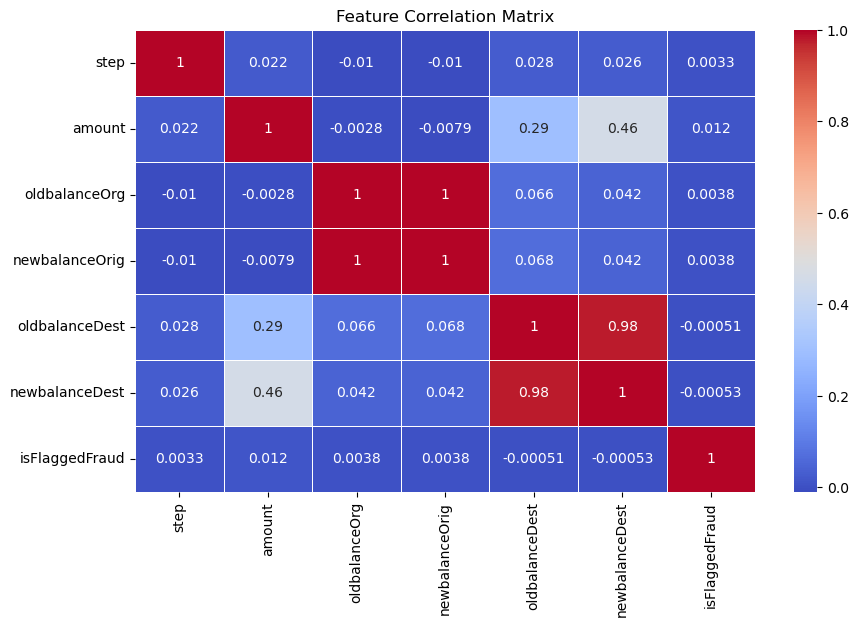

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']]  

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature         VIF
0            step    1.188500
1          amount    4.013501
2   oldbalanceOrg  465.124566
3  newbalanceOrig  466.906067
4  oldbalanceDest   71.790542
5  newbalanceDest   83.263477
6  isFlaggedFraud    1.000569


Observation 1 ::--
newbalanceorig and oldbalanceorig have 100% correlated to each other and vif > 10
newbalancedest and oldbalancedest have 98% correlated to each other and vif >10

So we can drop any one of the column from both of them 

Observation 2 ::--
Can drop nameDest and nameOrig columns which is not needed

### Copy original data

In [23]:
df1 = df.copy(deep = True)

### Droping unwanted columns

In [25]:
df.drop(columns = 'oldbalanceOrg',inplace = True)

In [26]:
df.drop(columns = 'oldbalanceDest',inplace = True)

In [27]:
df.drop(columns = 'nameOrig',inplace = True)

In [28]:
df.drop(columns = 'nameDest',inplace = True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   


# Sample dataset (excluding target variable)
X = df[['step', 'amount', 'newbalanceOrig','newbalanceDest', 'isFlaggedFraud']]  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Feature       VIF
0            step  1.161500
1          amount  1.373794
2  newbalanceOrig  1.064388
3  newbalanceDest  1.401915
4  isFlaggedFraud  1.000218


### Checking for outliers

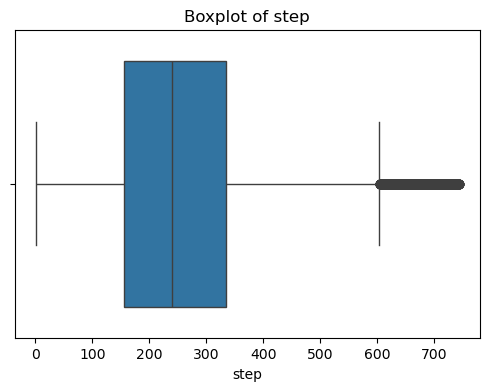

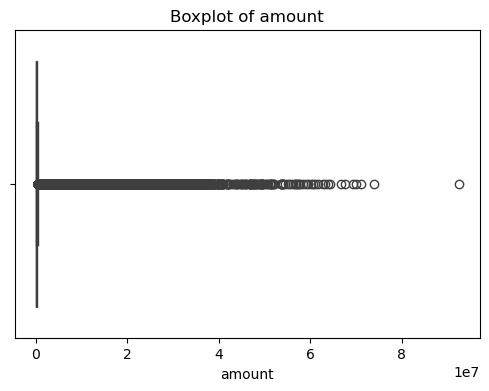

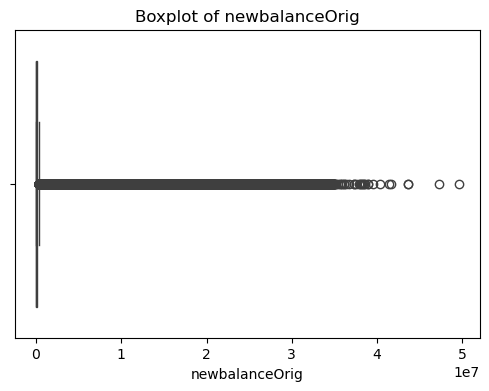

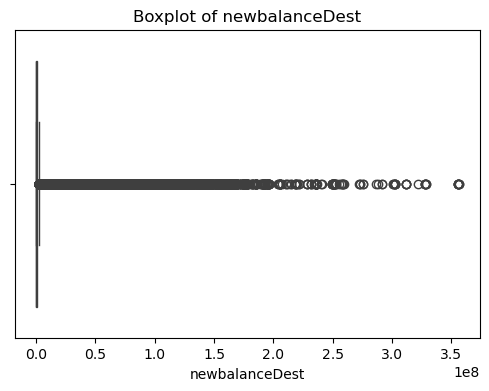

In [33]:
columns = ['step', 'amount', 'newbalanceOrig', 'newbalanceDest']

for i in columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=df[i])  
    plt.title(f"Boxplot of {i}")  #
    plt.show() 

In [34]:
lis = [ 'isFlaggedFraud','step','type']

In [35]:
for i in lis:
    print(df1[i].value_counts())
    print(df[i].nunique())
    print(df1.groupby(i)['isFraud'].value_counts(normalize =True) * 100)
    print('--'*30)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64
2
isFlaggedFraud  isFraud
0               0           99.871169
                1            0.128831
1               1          100.000000
Name: proportion, dtype: float64
------------------------------------------------------------
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
743
step  isFraud
1     0           99.409158
      1            0.590842
2     0           99.211045
      1            0.788955
3     0           99.275362
                    ...    
739   1          100.000000
740   1          100.000000
741   1          100.000000
742   1          100.000000
743   1          100.000000
Name: proportion, Length: 1164, dtype: float64
------------------------------------------------------------
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     

Obervations ::--
We can except fraud from CASH_OUT and TRANSFER type transactions
All isFlaggedFraud true transactions are fraud

In [38]:
df2 = df.copy(deep = True)

In [39]:
df

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,160296.36,0.00,0,0
1,1,PAYMENT,1864.28,19384.72,0.00,0,0
2,1,TRANSFER,181.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,0.00,0.00,1,0
4,1,PAYMENT,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,1,0
6362618,743,TRANSFER,850002.52,0.00,0.00,1,0


## OneHot Encoding 

In [41]:
df = pd.get_dummies(df,drop_first=True).astype(int)

In [42]:
df

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,160296,0,0,0,0,0,1,0
1,1,1864,19384,0,0,0,0,0,1,0
2,1,181,0,0,1,0,0,0,0,1
3,1,181,0,0,1,0,1,0,0,0
4,1,11668,29885,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682,0,339682,1,0,1,0,0,0
6362616,743,6311409,0,0,1,0,0,0,0,1
6362617,743,6311409,0,6379898,1,0,1,0,0,0
6362618,743,850002,0,0,1,0,0,0,0,1


In [43]:
df.reset_index(drop=True, inplace=True)

Observation ::--
Data is not scaled so performing standard sacling

## Spliting testing and training set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('isFraud',axis = 1)
y = df.isFraud

In [50]:
numerical_cols = ['step','amount', 'newbalanceOrig', 'newbalanceDest']

In [51]:
df[numerical_cols]

,step,amount,newbalanceOrig,newbalanceDest
0,1,9839,160296,0
1,1,1864,19384,0
2,1,181,0,0
3,1,181,0,0
4,1,11668,29885,0
...,...,...,...,...
6362615,743,339682,0,339682
6362616,743,6311409,0,0
6362617,743,6311409,0,6379898
6362618,743,850002,0,0


In [52]:
other_cols = [col for col in X.columns if col not in numerical_cols]

In [53]:
df[other_cols]

,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


## Robust Scaling

In [55]:
from sklearn.preprocessing import RobustScaler

In [56]:
scaler = RobustScaler()
scaled_num = scaler.fit_transform(X[numerical_cols])
scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_cols, index=X.index)

In [57]:
scaled_num_df

,step,amount,newbalanceOrig,newbalanceDest
0,-1.329609,-0.332933,1.111176,-0.193056
1,-1.329609,-0.373761,0.134370,-0.193056
2,-1.329609,-0.382377,0.000000,-0.193056
3,-1.329609,-0.382377,0.000000,-0.193056
4,-1.329609,-0.323570,0.207164,-0.193056
...,...,...,...,...
6362615,2.815642,1.355694,0.000000,0.112438
6362616,2.815642,31.927884,0.000000,-0.193056
6362617,2.815642,31.927884,0.000000,5.544732
6362618,2.815642,3.968272,0.000000,-0.193056


In [58]:
s_X = pd.concat([scaled_num_df, X[other_cols]], axis=1)

In [59]:
s_X

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332933,1.111176,-0.193056,0,0,0,1,0
1,-1.329609,-0.373761,0.134370,-0.193056,0,0,0,1,0
2,-1.329609,-0.382377,0.000000,-0.193056,0,0,0,0,1
3,-1.329609,-0.382377,0.000000,-0.193056,0,1,0,0,0
4,-1.329609,-0.323570,0.207164,-0.193056,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6362615,2.815642,1.355694,0.000000,0.112438,0,1,0,0,0
6362616,2.815642,31.927884,0.000000,-0.193056,0,0,0,0,1
6362617,2.815642,31.927884,0.000000,5.544732,0,1,0,0,0
6362618,2.815642,3.968272,0.000000,-0.193056,0,0,0,0,1


In [63]:
X_train,X_test,y_train,y_test = train_test_split(s_X,y,test_size= 0.2, stratify=y, random_state=0)

In [64]:
y_test.value_counts(normalize = True)*100

isFraud
0    99.870887
1     0.129113
Name: proportion, dtype: float64

In [66]:
y_train

1676258    0
1532444    0
4275262    0
1998321    0
2613451    0
          ..
5392248    0
6319334    0
5175250    0
915126     0
2384085    0
Name: isFraud, Length: 5090096, dtype: int32

## Resampling (UnderSampling)

In [69]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = rus.fit_resample(X_train, y_train)

In [70]:
y_train1.value_counts(normalize = True)*100

isFraud
0    50.0
1    50.0
Name: proportion, dtype: float64

## Model Building

In [148]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998   1270881
           1     0.9294    0.6652    0.7755      1643

    accuracy                         0.9995   1272524
   macro avg     0.9645    0.8326    0.8876   1272524
weighted avg     0.9995    0.9995    0.9995   1272524



In [123]:
y_train_pred = model.predict(X_train)

In [126]:
display(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train, y_train_pred, digits=4))

array([[5083526,       0],
       [      8,    6562]], dtype=int64)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   5083526
           1     1.0000    0.9988    0.9994      6570

    accuracy                         1.0000   5090096
   macro avg     1.0000    0.9994    0.9997   5090096
weighted avg     1.0000    1.0000    1.0000   5090096



In [132]:
display(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, digits=4))

array([[1270798,      83],
       [    550,    1093]], dtype=int64)

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998   1270881
           1     0.9294    0.6652    0.7755      1643

    accuracy                         0.9995   1272524
   macro avg     0.9645    0.8326    0.8876   1272524
weighted avg     0.9995    0.9995    0.9995   1272524



## Models UnderSampling

#### Using UnderSampling, SMOTE and TOMEK Link Models Accuracy is good but Precision and f1-score is not good

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train1,y_train1)
y_train_pred = model1.predict(X_train1)
y_test_pred = model1.predict(X_test)
display(confusion_matrix(y_train1,y_train_pred))
display(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_train1,y_train_pred))
print(classification_report(y_test,y_test_pred))

array([[5269, 1301],
       [ 782, 5788]], dtype=int64)

array([[1014923,  255958],
       [    217,    1426]], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6570
           1       0.82      0.88      0.85      6570

    accuracy                           0.84     13140
   macro avg       0.84      0.84      0.84     13140
weighted avg       0.84      0.84      0.84     13140

              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1270881
           1       0.01      0.87      0.01      1643

    accuracy                           0.80   1272524
   macro avg       0.50      0.83      0.45   1272524
weighted avg       1.00      0.80      0.89   1272524



## Decision Tree 

In [137]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train1, y_train1)
y_train_pred = model2.predict(X_train1)
y_test_pred = model2.predict(X_test)
display(confusion_matrix(y_train1,y_train_pred))
display(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_train1,y_train_pred))
print(classification_report(y_test,y_test_pred))

array([[6570,    0],
       [   0, 6570]], dtype=int64)

array([[1157524,  113357],
       [    152,    1491]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6570
           1       1.00      1.00      1.00      6570

    accuracy                           1.00     13140
   macro avg       1.00      1.00      1.00     13140
weighted avg       1.00      1.00      1.00     13140

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270881
           1       0.01      0.91      0.03      1643

    accuracy                           0.91   1272524
   macro avg       0.51      0.91      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30,max_depth = 10,n_jobs=-1)
model3.fit(X_train1, y_train1)
y_train_pred = model3.predict(X_train1)
y_test_pred = model3.predict(X_test)
display(confusion_matrix(y_train1,y_train_pred))
display(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_train1,y_train_pred))
print(classification_report(y_test,y_test_pred))

array([[6418,  152],
       [ 617, 5953]], dtype=int64)

array([[1227156,   43725],
       [    190,    1453]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6570
           1       0.98      0.91      0.94      6570

    accuracy                           0.94     13140
   macro avg       0.94      0.94      0.94     13140
weighted avg       0.94      0.94      0.94     13140

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.03      0.88      0.06      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.92      0.52   1272524
weighted avg       1.00      0.97      0.98   1272524

